# Project: Case Study - 2

In [1]:
# importing the libraries #I used these libraries again for individual codes too just so that each cell can work independently 
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

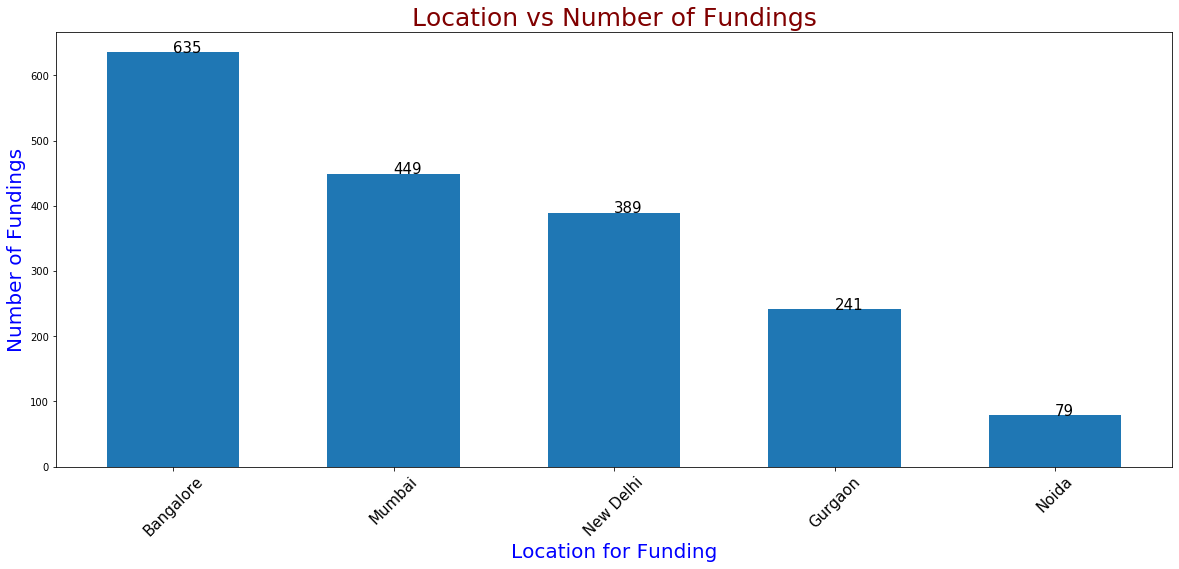

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


In [2]:
# 1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv', encoding = 'utf-8')

df['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity)
df.CityLocation.replace('Delhi','New Delhi', inplace = True)
df.CityLocation.replace('bangalore','Bangalore', inplace = True)
location = df.CityLocation

d = {}
for i in location:
    if i == 'Bangalore':
        d[i] = d.get(i,0) + 1
    elif i == 'Mumbai':
        d[i] = d.get(i,0) + 1
    elif i == 'Gurgaon':
        d[i] = d.get(i,0) + 1
    elif i == 'Noida':
        d[i] = d.get(i,0) + 1
    elif i == 'New Delhi':
        d[i] = d.get(i,0) + 1

x = list(d.keys())        
y = list(d.values())
plt.rcParams['figure.figsize'] = [20,8]
plt.bar(x, y, width=0.6)
plt.title('Location vs Number of Fundings', fontsize=25,color='maroon')
plt.xlabel('Location for Funding', fontsize=20, color='blue')
plt.ylabel('Number of Fundings', fontsize=20, color='blue')
plt.xticks(rotation = 45, fontsize=15)
for i in range(len(x)):
    plt.text(x[i], y[i], y[i],fontsize=15)
plt.show()

for i in range(len(x)):
    print(x[i],y[i])

### Question 2

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


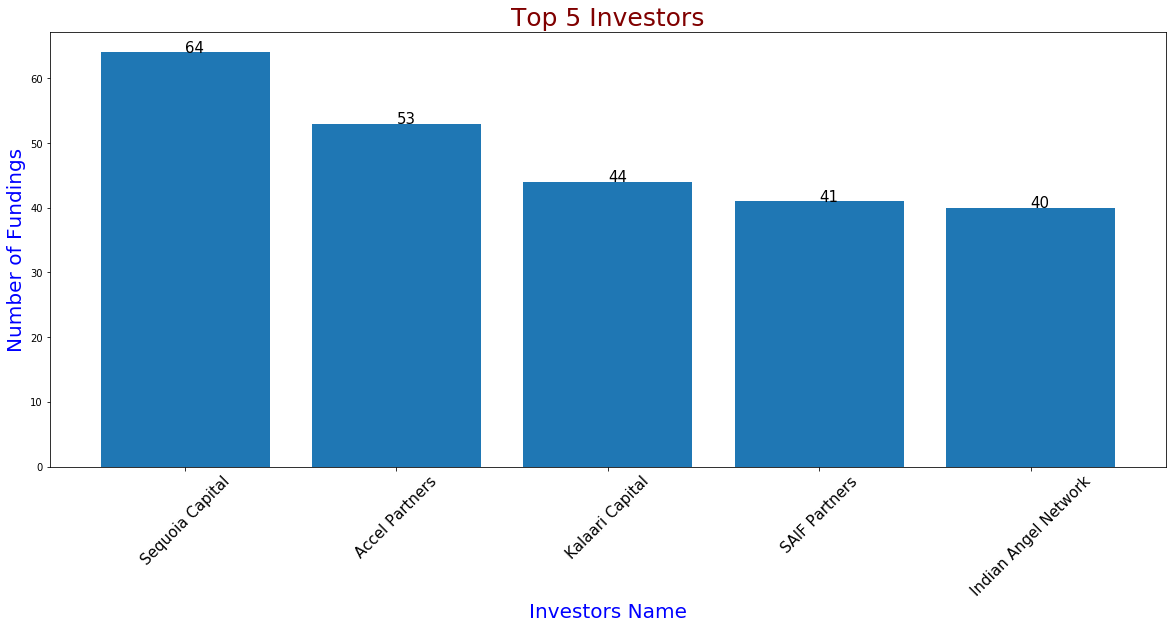

In [3]:
# 2
import numpy as np
import pandas as pd
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.dropna(inplace=True)

def createDictionary(array):
    dictionary = {}
    for i in array:
        if ',' not in i:
            dictionary[i] = dictionary.get(i,0) + 1
        else:
            string = i.strip().split(',')
            for j in string:
                insert = j.strip()
                dictionary[insert] = dictionary.get(insert,0) + 1
    return dictionary

dictionary = createDictionary(df.InvestorsName)
dataf = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf = dataf.sort_values(by=[0],ascending=False)[:5]
for i in range(5):
    print(dataf.index[i],dataf.values[i][0])

x = list(dataf.index)
y = []
for i in range(5):
    y.append(dataf.values[i][0])
plt.bar(x,y)
plt.title('Top 5 Investors', fontsize=25,color='maroon')
plt.xlabel('Investors Name', fontsize=20, color='blue')
plt.ylabel('Number of Fundings', fontsize=20, color='blue')
plt.xticks(rotation = 45, fontsize=15)
for i in range(len(x)):
    plt.text(x[i], y[i], y[i],fontsize=15)
plt.show()


### Question 3

Indian Angel Network 33
Ratan Tata 27
Kalaari Capital 25
Sequoia Capital 18
Accel Partners 18


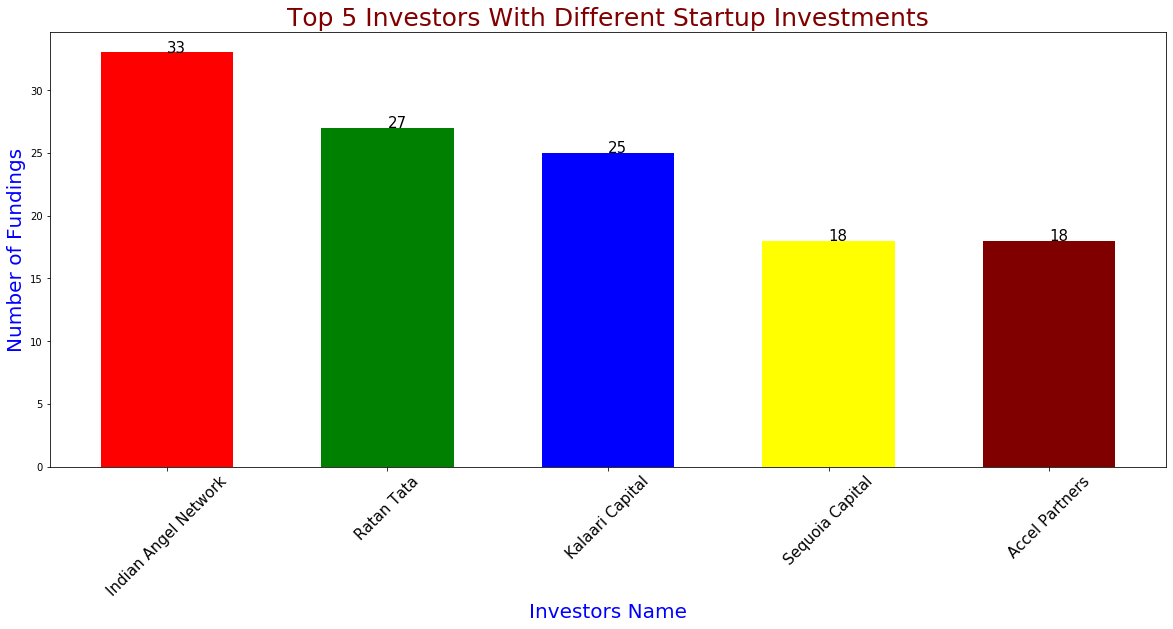

In [4]:
# 3
import pandas as pd
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestorsName.dropna(inplace=True)


df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)


def createDictionary(investor,startup):
    index = investor.index
    dictionary = {}
    for i in index:
        if ',' not in investor[i]:
            if investor[i] in dictionary:
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
            else:
                dictionary[investor[i]] = []
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
        else:
            string = investor[i].strip().split(',')
            #print(string)
            for j in range(len(string)):
                if string[j] in dictionary:
                    if startup[i] not in dictionary[string[j]]:
                        dictionary[string[j]].append(startup[i])
                    else:
                        dictionary[string[j]] = []
                        if startup[i] not in dictionary[string[j]]:
                            dictionary[string[j]].append(startup[i])
    return dictionary

investorInvestments = createDictionary(df.InvestorsName,df.StartupName)

for i in investorInvestments:
    investorInvestments[i] = len(investorInvestments[i])

dataf = pd.DataFrame(list(investorInvestments.values()),list(investorInvestments.keys()))
dataf = dataf.sort_values(by=[0],ascending=False)

i = 0
count = 0
x = []
y = []
while count<5:
    if dataf.index[i] == 'Undisclosed Investors' or dataf.index[i] == 'Undisclosed investors':
        i += 1
        continue
    
    x.append(dataf.index[i])
    y.append(dataf.values[i][0])
    print(dataf.index[i],dataf.values[i][0])
    count += 1
    i += 1

plt.bar(x,y, color=['red','green','blue','yellow','maroon'], width = 0.6)
plt.title('Top 5 Investors With Different Startup Investments', fontsize=25,color='maroon')
plt.xlabel('Investors Name', fontsize=20, color='blue')
plt.ylabel('Number of Fundings', fontsize=20, color='blue')
plt.xticks(rotation = 45, fontsize=15)
for i in range(len(x)):
    plt.text(x[i], y[i], y[i],fontsize=15)
plt.show()

### Question 4

Indian Angel Network 31
Group of Angel Investors 14
Kae Capital 10
YouWeCan Ventures 9
Ratan Tata 8


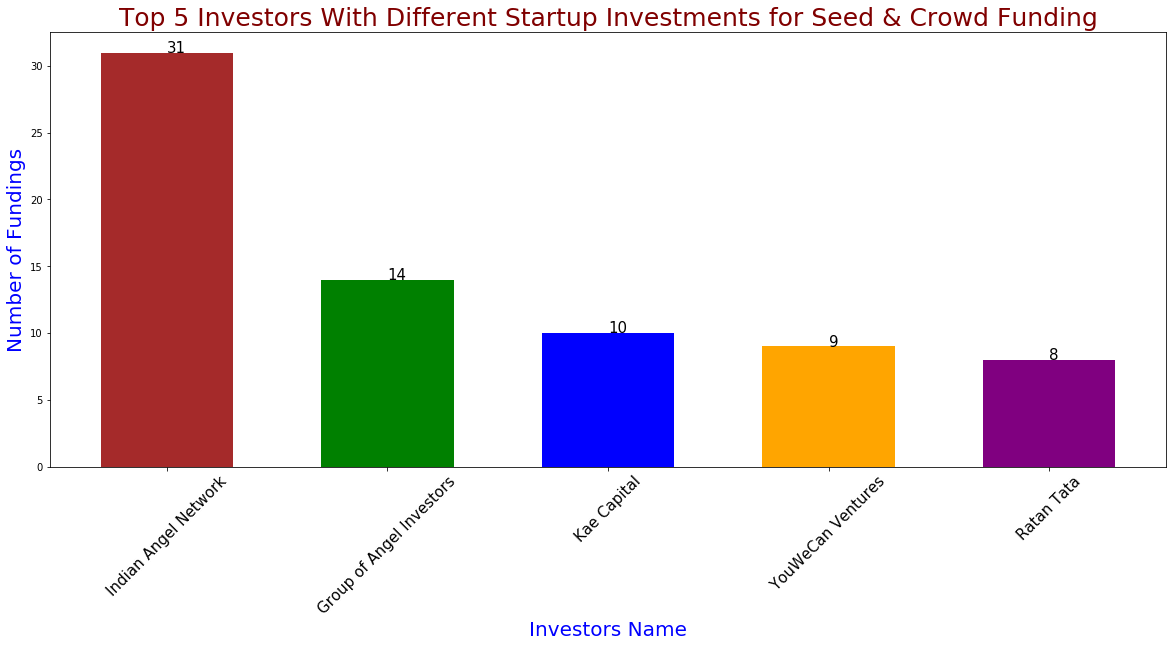

In [5]:
# 4
import pandas as pd
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestmentType.replace('SeedFunding','Seed Funding',inplace=True)
df.InvestmentType.replace('PrivateEquity','Private Equity',inplace=True)
df.InvestmentType.replace('Crowd funding','Crowd Funding',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df1 = df.copy()
df1 = df1[(df1.InvestmentType== 'Crowd Funding')|(df1.InvestmentType== 'Seed Funding')]
df1.InvestorsName.dropna(inplace=True)


def createDictionary(investor,startup):
    index = investor.index
    dictionary = {}
    for i in index:
        if ',' not in investor[i]:
            if investor[i] in dictionary:
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
            else:
                dictionary[investor[i]] = []
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
        else:
            string = investor[i].strip().split(',')
            #print(string)
            for j in range(len(string)):
                if string[j] in dictionary:
                    if startup[i] not in dictionary[string[j]]:
                        dictionary[string[j]].append(startup[i])
                    else:
                        dictionary[string[j]] = []
                        if startup[i] not in dictionary[string[j]]:
                            dictionary[string[j]].append(startup[i])
    return dictionary

investorInvestments = createDictionary(df1.InvestorsName,df1.StartupName)

for i in investorInvestments:
    investorInvestments[i] = len(investorInvestments[i])

dataf = pd.DataFrame(list(investorInvestments.values()),list(investorInvestments.keys()))
dataf = dataf.sort_values(by=[0],ascending=False)

i = 0
count = 0
x = []
y = []
while count<5:
    if dataf.index[i].casefold()=='Undisclosed Investors'.casefold() or dataf.index[i].casefold()=='Undisclosed Investor'.casefold():
        i += 1
        continue
    
    x.append(dataf.index[i])
    y.append(dataf.values[i][0])
    print(dataf.index[i],dataf.values[i][0])
    count += 1
    i += 1

plt.bar(x,y, color=['brown','green','blue','orange','purple'], width = 0.6)
plt.title('Top 5 Investors With Different Startup Investments for Seed & Crowd Funding', fontsize=25,color='maroon')
plt.xlabel('Investors Name', fontsize=20, color='blue')
plt.ylabel('Number of Fundings', fontsize=20, color='blue')
plt.xticks(rotation = 45, fontsize=15)
for i in range(len(x)):
    plt.text(x[i], y[i], y[i],fontsize=15)
plt.show()

### Question 5

Kalaari Capital 19
Ratan Tata 19
Tiger Global 17
Sequoia Capital 15
Accel Partners 15


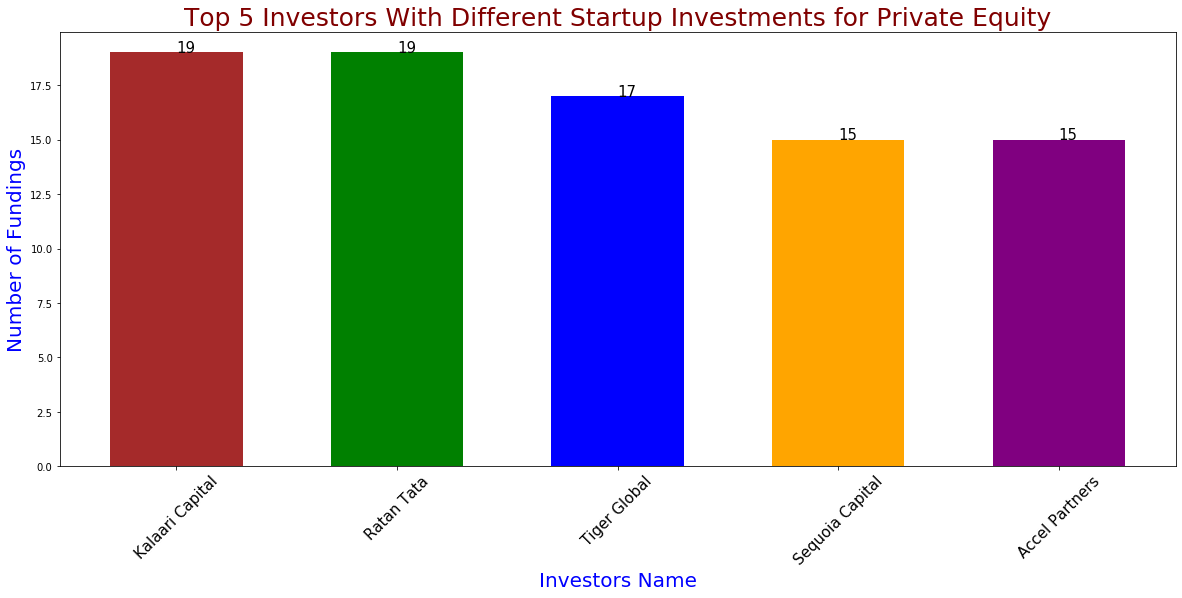

In [6]:
#5
import pandas as pd
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.InvestmentType.replace('SeedFunding','Seed Funding',inplace=True)
df.InvestmentType.replace('PrivateEquity','Private Equity',inplace=True)
df.InvestmentType.replace('Crowd funding','Crowd Funding',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df1 = df.copy()
df1 = df1[(df1.InvestmentType== 'Private Equity')]
df1.InvestorsName.dropna(inplace=True)


def createDictionary(investor,startup):
    index = investor.index
    dictionary = {}
    for i in index:
        if ',' not in investor[i]:
            if investor[i] in dictionary:
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
            else:
                dictionary[investor[i]] = []
                if startup[i] not in dictionary[investor[i]]:
                    dictionary[investor[i]].append(startup[i])
        else:
            string = investor[i].strip().split(',')
            #print(string)
            for j in range(len(string)):
                if string[j] in dictionary:
                    if startup[i] not in dictionary[string[j]]:
                        dictionary[string[j]].append(startup[i])
                    else:
                        dictionary[string[j]] = []
                        if startup[i] not in dictionary[string[j]]:
                            dictionary[string[j]].append(startup[i])
    return dictionary

investorInvestments = createDictionary(df1.InvestorsName,df1.StartupName)

for i in investorInvestments:
    investorInvestments[i] = len(investorInvestments[i])

dataf = pd.DataFrame(list(investorInvestments.values()),list(investorInvestments.keys()))
dataf = dataf.sort_values(by=[0],ascending=False)

x = []
y = []
i = 0
count = 0
while count<5:
    if dataf.index[i].casefold()=='Undisclosed Investors'.casefold() or dataf.index[i].casefold()=='Undisclosed Investor'.casefold():
        i += 1
        continue
    
    x.append(dataf.index[i])
    y.append(dataf.values[i][0])
    print(dataf.index[i],dataf.values[i][0])
    count += 1
    i += 1

plt.bar(x,y, color=['brown','green','blue','orange','purple'], width = 0.6)
plt.title('Top 5 Investors With Different Startup Investments for Private Equity', fontsize=25,color='maroon')
plt.xlabel('Investors Name', fontsize=20, color='blue')
plt.ylabel('Number of Fundings', fontsize=20, color='blue')
plt.xticks(rotation = 45, fontsize=15)
for i in range(len(x)):
    plt.text(x[i], y[i], y[i],fontsize=15)
plt.show()